<a href="https://colab.research.google.com/github/WicfuL-io/google_colab/blob/main/Natural%20Language%20Processing/UasNlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import seaborn as sns
import itertools
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
df_read = pd.read_csv('combined_emotion.csv')
df_read

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sad
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughl...,fear
...,...,...
422741,i begun to feel distressed for you,fear
422742,i left feeling annoyed and angry thinking that...,anger
422743,i were to ever get married i d have everything...,joy
422744,i feel reluctant in applying there because i w...,fear


In [ ]:
df = pd.DataFrame(df_read[['sentence', 'emotion']])
df

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sad
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughl...,fear
...,...,...
422741,i begun to feel distressed for you,fear
422742,i left feeling annoyed and angry thinking that...,anger
422743,i were to ever get married i d have everything...,joy
422744,i feel reluctant in applying there because i w...,fear


In [ ]:
df['emotion'].value_counts()

,count
emotion,
joy,143067
sad,121187
anger,59317
fear,49649
love,34554
suprise,14972


In [ ]:
df = df.astype ({'emotion' : 'category'})
df = df.astype ({'sentence' : 'string'})
df.dtypes

,0
sentence,string[python]
emotion,category


In [ ]:
df['emotion'] = df['emotion'].map({'joy': 0, 'sad': 1, 'anger': 2, 'fear': 3, 'love': 4, 'suprise': 5})
X = df['sentence']
y = df['emotion']
df

,sentence,emotion
0,i just feel really helpless and heavy hearted,3
1,ive enjoyed being able to slouch about relax a...,1
2,i gave up my internship with the dmrg and am f...,3
3,i dont know i feel so lost,1
4,i am a kindergarten teacher and i am thoroughl...,3
...,...,...
422741,i begun to feel distressed for you,3
422742,i left feeling annoyed and angry thinking that...,2
422743,i were to ever get married i d have everything...,0
422744,i feel reluctant in applying there because i w...,3


<Axes: ylabel='count'>

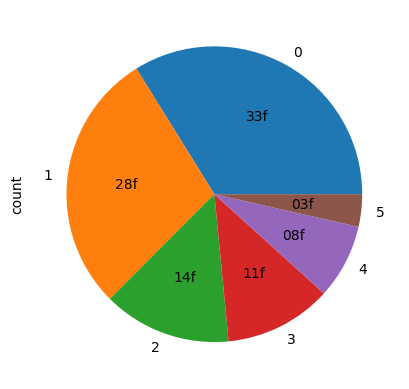

In [ ]:
y.value_counts().plot.pie(autopct='%.2df')

      words   count
0         i  685827
1      feel  293986
2       and  253802
3        to  236530
4       the  219819
5         a  165233
6   feeling  136149
7      that  132596
8        of  131803
9        my  112738
10       in   87739
11       it   85627
12     like   74964
13       so   65944
14      for   64841


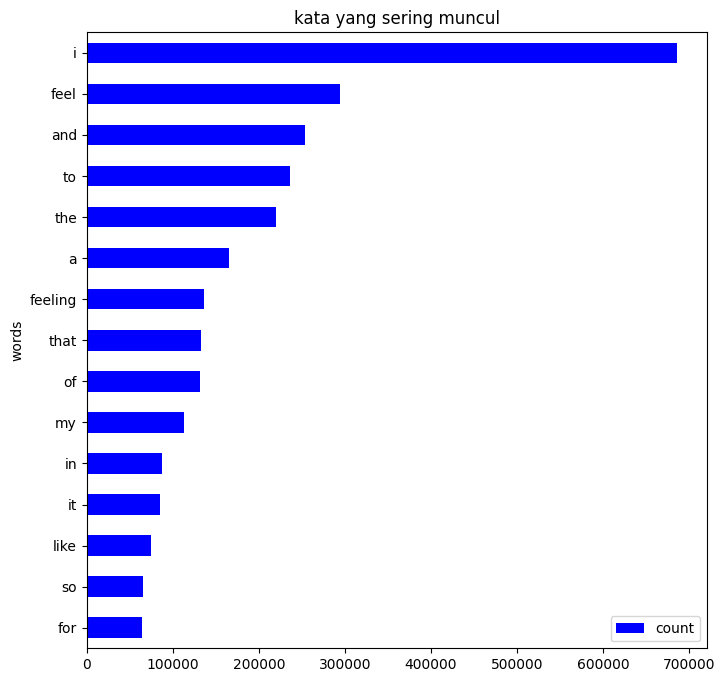

In [ ]:
all_words = ' '.join([text for text in df['sentence']])

all_words = all_words.split()

# List of all words across tweets
all_words_no_urls = list(itertools.chain(all_words))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)


clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

print(clean_tweets_no_urls)

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("kata yang sering muncul")

plt.show()

## sentimen

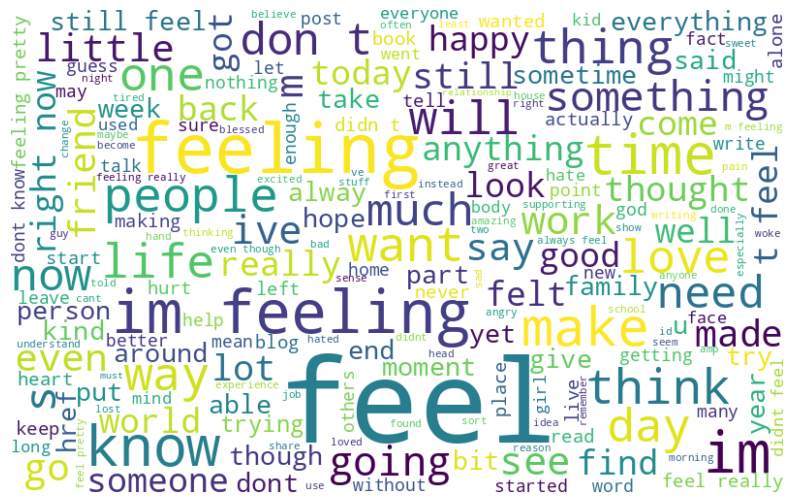

In [ ]:
def plot_wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')


all_words = ' '.join([text for text in df['sentence']])
plot_wordCloud(all_words)

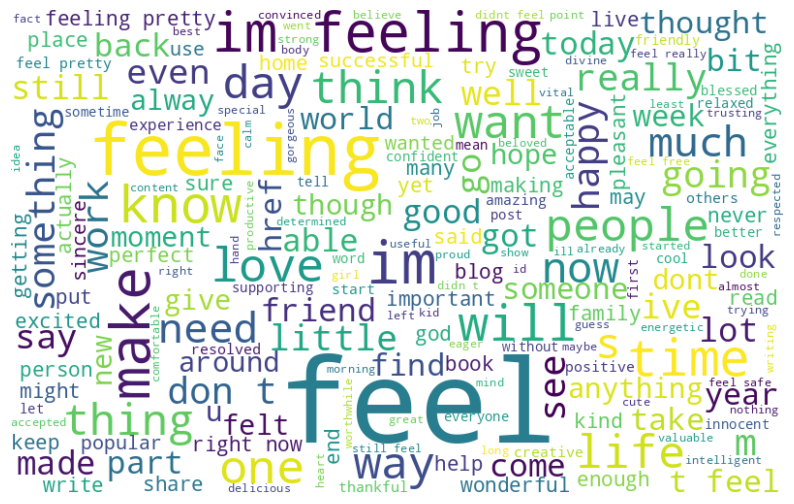

In [ ]:
joy_words = ' '.join(text for text in df['sentence'][df['emotion'] == 0])
plot_wordCloud(joy_words)

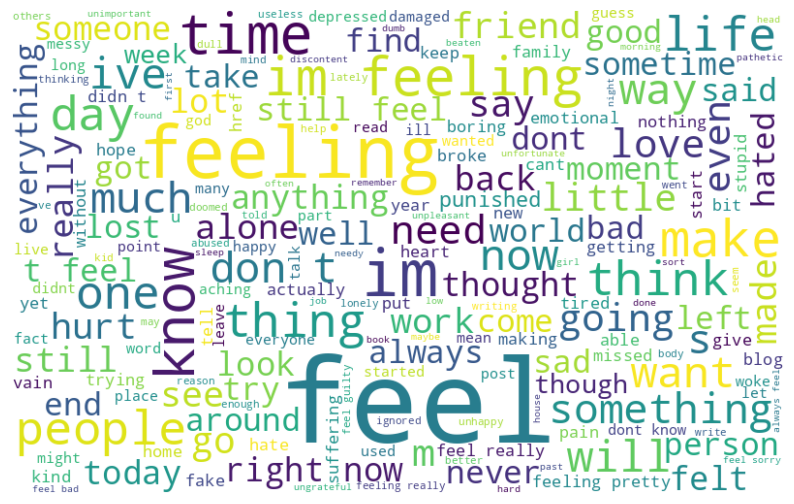

In [ ]:
sad_words = ' '.join(text for text in df['sentence'][df['emotion'] == 1])
plot_wordCloud(sad_words)

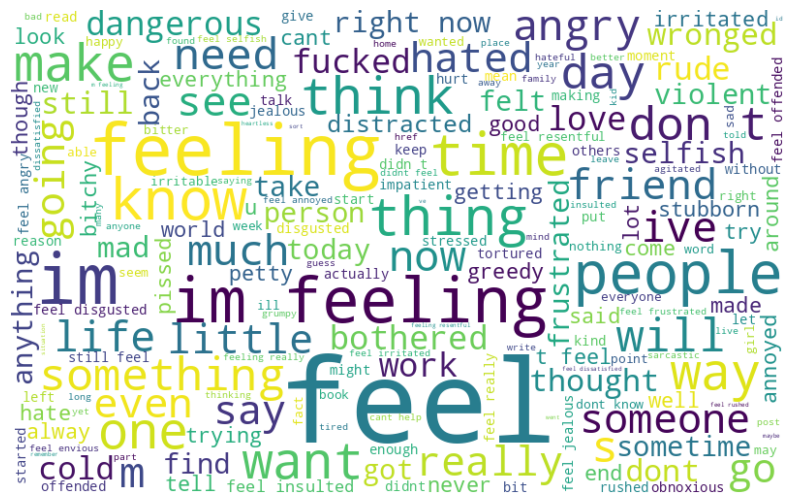

In [ ]:
anger_words = ' '.join(text for text in df['sentence'][df['emotion'] == 2])
plot_wordCloud(anger_words)

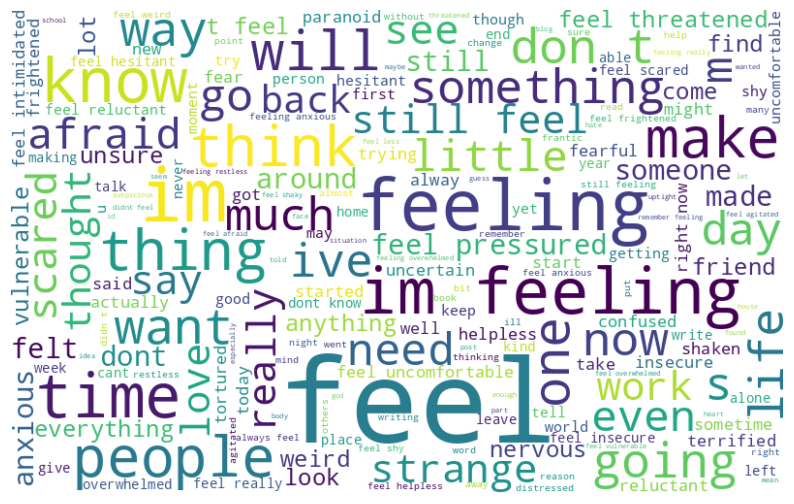

In [ ]:
fear_words = ' '.join(text for text in df['sentence'][df['emotion'] == 3])
plot_wordCloud(fear_words)

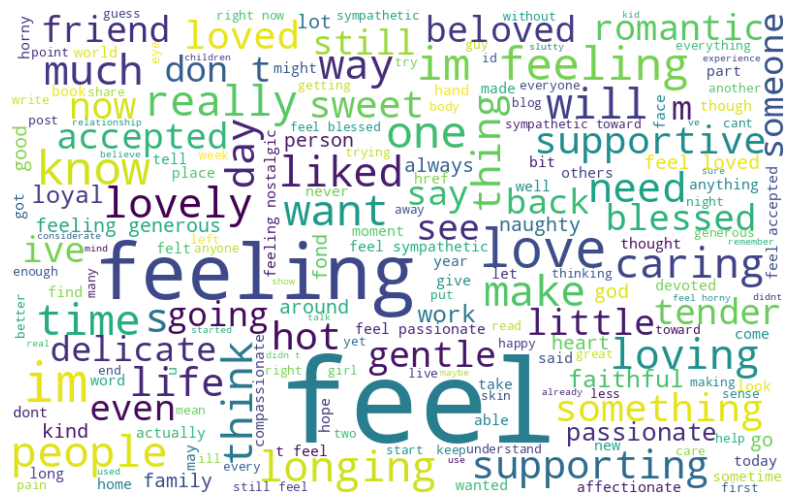

In [ ]:
love_words = ' '.join(text for text in df['sentence'][df['emotion'] == 4])
plot_wordCloud(love_words)

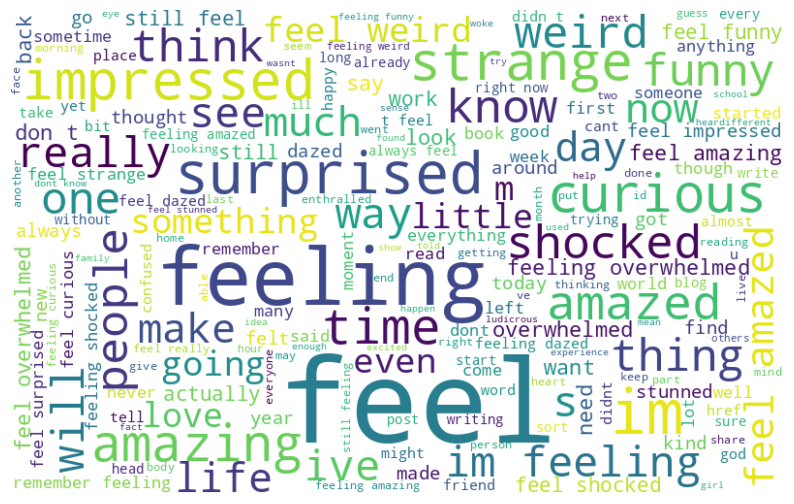

In [ ]:
suprise_words = ' '.join(text for text in df['sentence'][df['emotion'] == 5])
plot_wordCloud(suprise_words)

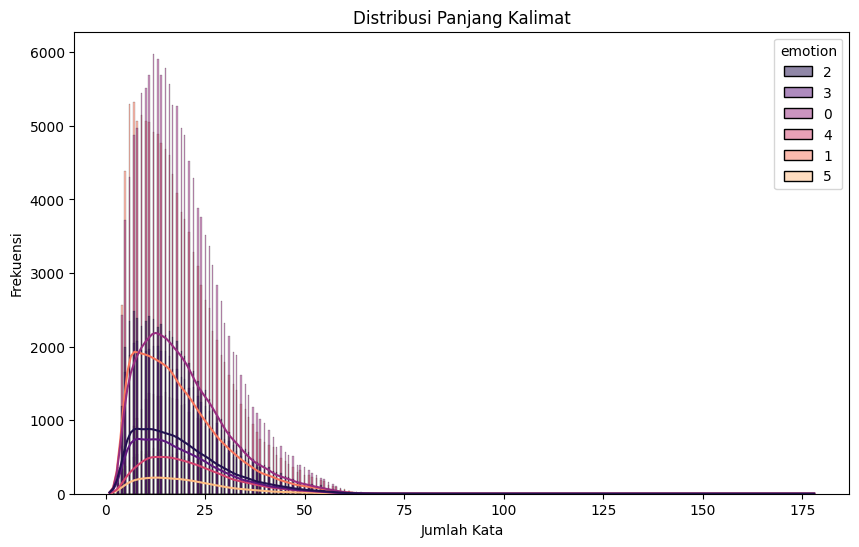

In [ ]:
# Asumsikan df sudah berisi data dengan kolom 'cleaned_sentence' dan 'emotion'
df['sentence_length'] = df['sentence'].apply(lambda x: len(x.split()))

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sentence_length', hue='emotion', kde=True, palette='magma')
plt.title('Distribusi Panjang Kalimat')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

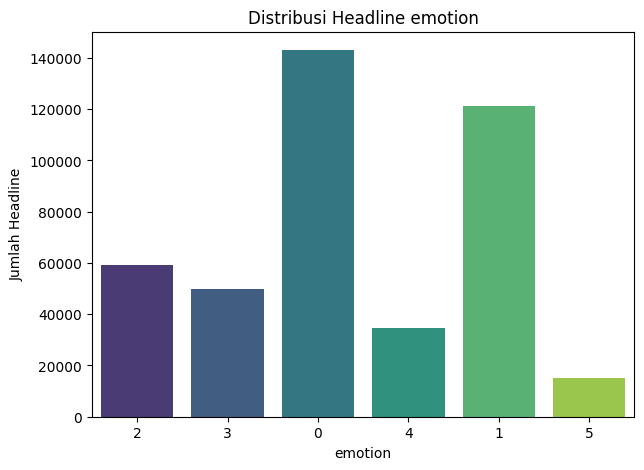

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='emotion', data=df, palette='viridis')
plt.title('Distribusi Headline emotion')
plt.xlabel('emotion')
plt.ylabel('Jumlah Headline')
plt.show()

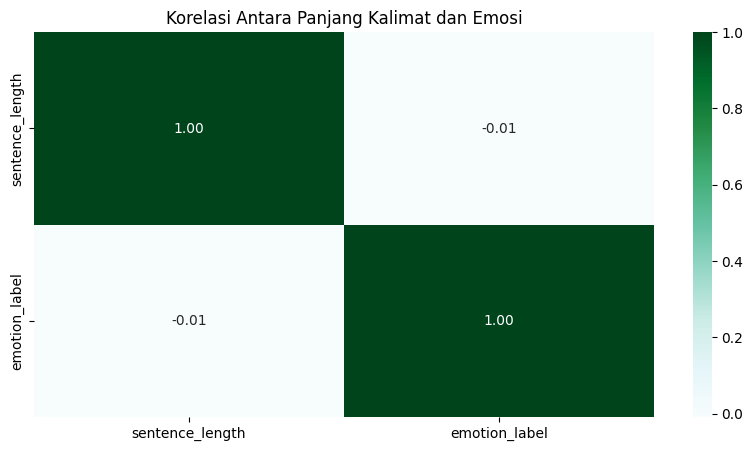

In [ ]:
# df sudah memiliki kolom 'sentence_length' dan 'emotion'
# Ubah emosi ke bentuk angka agar bisa dihitung korelasinya
df['emotion_label'] = df['emotion'].astype('category').cat.codes

# Buat DataFrame numerik
x = df[['sentence_length', 'emotion_label']]

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(x.corr(), annot=True, fmt='.2f', cmap='BuGn')
plt.title('Korelasi Antara Panjang Kalimat dan Emosi')
plt.show()

In [ ]:
#instantiate CountVectorizer()
cv=CountVectorizer()

# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(X)
print(word_count_vector.shape)

tokens = cv.get_feature_names_out()
print(tokens)

(422746, 75276)
['aa' 'aaa' 'aaaa' ... 'zzzzzz' 'zzzzzzs' 'zzzzzzz']


In [ ]:
print(df['sentence_length'].apply(type).value_counts())

sentence_length
<class 'int'>    422746
Name: count, dtype: int64


In [ ]:
# Ganti yang bukan string jadi string kosong
df['sentence_length_str'] = df['sentence_length'].apply(lambda x: x if isinstance(x, str) else '')

In [ ]:
X = df['sentence']  # Setelah dibersihkan

cv = CountVectorizer()
word_count_vector = cv.fit_transform(x)
tokens = cv.get_feature_names_out()

print("Jumlah dokumen:", word_count_vector.shape[0])
print("Jumlah fitur unik:", word_count_vector.shape[1])
print("Contoh kata:", tokens[:10])

Jumlah dokumen: 2
Jumlah fitur unik: 2
Contoh kata: ['emotion_label' 'sentence_length']


In [ ]:
vectorizer = TfidfVectorizer()
data = vectorizer.fit_transform(X)

In [ ]:
print(data)
print(data.shape)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6606023 stored elements and shape (422746, 75276)>
  Coords	Values
  (0, 35112)	0.2380351568649662
  (0, 23283)	0.0970096731295758
  (0, 53601)	0.263957308087395
  (0, 29559)	0.4080026423639176
  (0, 2384)	0.12472054847583144
  (0, 29386)	0.543130240264721
  (0, 29316)	0.6222885967497358
  (1, 53601)	0.10244627103336924
  (1, 2384)	0.14521842799315535
  (1, 33961)	0.1169340227146558
  (1, 20981)	0.2001287146390028
  (1, 5868)	0.11115232898125413
  (1, 159)	0.14568005117549757
  (1, 67249)	0.10223379887838605
  (1, 60726)	0.34169379108733106
  (1, 211)	0.08709248935539002
  (1, 54489)	0.21125232982882633
  (1, 70494)	0.27564815766584594
  (1, 25005)	0.22544755767997907
  (1, 44471)	0.17829432278113694
  (1, 33860)	0.07393595426860167
  (1, 1163)	0.1315446378308734
  (1, 66666)	0.1352836500383268
  (1, 37114)	0.14153378163817085
  (1, 23541)	0.14422665077370161
  :	:
  (422744, 23784)	0.24291731772429567
  (422744, 36274)	0.18

In [ ]:
X= data
y= df['emotion']

In [ ]:
#X1, Y1= X,Y
#Y = Y1.values
sm = SMOTE(random_state=5)
X_Smote, Y_Smote = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(Y_Smote))

Resampled dataset shape Counter({3: 143067, 1: 143067, 4: 143067, 0: 143067, 5: 143067, 2: 143067})


In [ ]:
# Split 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(
    X_Smote, Y_Smote, test_size=0.2, random_state=42, stratify=Y_Smote
)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(686721, 75276)
(171681, 75276)


In [ ]:
model = SVC(kernel="rbf", C=5)

model.fit(X_train,y_train)
prediksi = model.predict(X_test)

In [ ]:
print ("Accuracy RBF: ", accuracy_score(y_test, prediksi) *100, '%')
print ("Confusion Matrix RBF:")
print (confusion_matrix(y_test, prediksi))
print (classification_report (y_test, prediksi))
print ("\n")

Accuracy RBF:  99.99941752436204 %
Confusion Matrix RBF:
[[28613     0     0     0     0     0]
 [    0 28612     1     0     0     0]
 [    0     0 28614     0     0     0]
 [    0     0     0 28614     0     0]
 [    0     0     0     0 28614     0]
 [    0     0     0     0     0 28613]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28613
           1       1.00      1.00      1.00     28613
           2       1.00      1.00      1.00     28614
           3       1.00      1.00      1.00     28614
           4       1.00      1.00      1.00     28614
           5       1.00      1.00      1.00     28613

    accuracy                           1.00    171681
   macro avg       1.00      1.00      1.00    171681
weighted avg       1.00      1.00      1.00    171681





In [ ]:
# Hapus URL, angka, dan simbol asing
def remove(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # hapus url
    text = re.sub(r"\d+", "", text)                      # hapus angka
    text = re.sub(r"[^a-z\s]", "", text)                 # hapus karakter non-huruf
    return text.strip()

# Hapus tanda baca (jika masih ada)
def remove_punct(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
# Preprocessing and vectorizer for testing models
def preprocess_data(text):

    text = remove(text)

    text = remove_punct(text)

    text = vectorizer.transform([text]).toarray()

    return text

In [ ]:
review = "I hate you"

In [ ]:
hasinya = model.predict(preprocess_data(review))

In [ ]:
if hasinya == 0 :
    print("joy")
elif hasinya == 1 :
    print("sad")
elif hasinya == 2 :
    print("anger")
elif hasinya == 3 :
    print("fear")
elif hasinya == 4 :
    print("love")
elif hasinya == 5 :
    print("suprise")

anger
